<a href="https://colab.research.google.com/github/RajivShrestha-371/AI-Artificial-Intelligence-/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Define 5 important features and synthesize data
np.random.seed(42)
data_size = 100

# Features: [Attendance %, Study Hours per Day, Assignments Completed %, Participation %, Test Scores %]
data = {
    "Attendance": np.random.randint(60, 101, data_size),
    "Study_Hours": np.random.uniform(0.5, 5, data_size).round(2),
    "Assignments_Completed": np.random.randint(50, 101, data_size),
    "Participation": np.random.randint(40, 101, data_size),
    "Test_Scores": np.random.randint(50, 101, data_size),
}

def determine_grade(row):
    """Function to determine grade based on synthetic features."""
    avg_score = (row["Attendance"] * 0.2 + row["Study_Hours"] * 10 + row["Assignments_Completed"] * 0.2 +
                 row["Participation"] * 0.1 + row["Test_Scores"] * 0.3)
    if avg_score >= 85:
        return "A"
    elif avg_score >= 70:
        return "B"
    elif avg_score >= 55:
        return "C"
    else:
        return "D"

In [3]:
# Create DataFrame
data_df = pd.DataFrame(data)
data_df["Grade"] = data_df.apply(determine_grade, axis=1)

# Save to CSV
data_df.to_csv("student_grades.csv", index=False)
print("Synthetic data saved to 'student_grades.csv'")

Synthetic data saved to 'student_grades.csv'


In [4]:
# Step 2: Load data from CSV
data_df = pd.read_csv("student_grades.csv")
X = data_df.drop("Grade", axis=1)
y = data_df["Grade"]

In [5]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Apply KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Step 5: Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy:.2f}")
print("Predicted Grades:", y_pred)
print("Actual Grades:", y_test.values)


Accuracy of KNN classifier: 0.60
Predicted Grades: ['A' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A'
 'A' 'A']
Actual Grades: ['A' 'C' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'B' 'A'
 'A' 'A']


In [8]:
# Extended Predictions
# Predict Risk of Dropout
risk_of_dropout = ["High" if x < 70 else "Low" for x in X_test["Attendance"]]
X_test["Risk_of_Dropout"] = risk_of_dropout

# Predict Future Performance
future_performance = knn.predict(X_test.drop("Risk_of_Dropout", axis=1))
X_test["Future_Grade"] = future_performance

print("\nPredictions Extended:")
print(X_test[["Attendance", "Study_Hours", "Future_Grade", "Risk_of_Dropout"]])


Predictions Extended:
    Attendance  Study_Hours Future_Grade Risk_of_Dropout
83          60         4.26            A            High
53          61         1.95            B            High
70          75         1.15            A             Low
45          66         4.37            B            High
44          87         4.18            A             Low
39          73         4.53            A             Low
22          92         4.58            A             Low
80          66         3.35            A            High
10          83         3.92            A             Low
0           98         1.99            A             Low
18          89         0.64            A             Low
30          62         4.68            A            High
73          85         1.59            A             Low
33          80         4.42            A             Low
90          94         2.80            B             Low
4           80         3.78            B             Low
76      

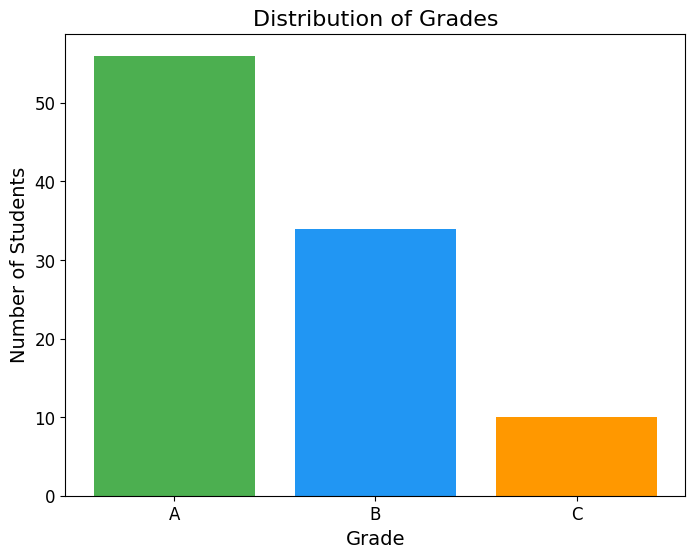

In [10]:
# Step 6: Visualize Grade Distribution
import matplotlib.pyplot as plt
grade_counts = data_df["Grade"].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(grade_counts.index, grade_counts.values, color=["#4caf50", "#2196f3", "#ff9800", "#f44336"])
plt.title("Distribution of Grades", fontsize=16)
plt.xlabel("Grade", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
